In [3]:
import cv2
import os
import glob
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from skimage import exposure
from keras.utils import np_utils

In [4]:
dataAugment = True
if(dataAugment): from keras.preprocessing.image import ImageDataGenerator
    
augRatio = 3  #Data augmentation時，要產生幾倍數量的dataset
testimg = "dataset/train/Small-flowered Cranesbill/1f14ed265.png"
ratioVal = 0.2  #要從train dataset取出多少比例的資料作為validate dataset
reSize=(224,224)  #訓練前圖片要縮放的尺寸
epochs = 100  #要跑幾個世代
batch_size = 64   #每批次提取多少數量的圖片進行訓練
trainDataset = "dataset/train"  #Train dataset的路徑
testDataset = "dataset/test"   #Test dataset的路徑
#Lable的對應, 每個Lable對應到一個數值
dict_labels = {"Black-grass": 0,"Charlock": 1, "Cleavers": 2, "Common Chickweed": 3, "Common wheat": 4, "Fat Hen": 5,
              "Loose Silky-bent": 6, "Maize": 7, "Scentless Mayweed": 8, "Shepherds Purse": 9, "Small-flowered Cranesbill": 10, 
              "Sugar beet": 11 }

#存放dataset及Label使用
images = []
labels = []
labels_hot = []
testImages = []
testImagesName = []

In [5]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()

In [6]:
def load_image(folder):    
    global images, labels, labels_hot, dict_labels
    
    for filename in os.listdir(folder):
        label = os.path.basename(folders)
        className = np.asarray( label )        
        if label is not None:
            labels.append(className)
            labels_hot.append(dict_labels[label])
            #np.append(labels, className , axis=0)
            #np.append(labels_hot, np.array(dict_labels[label]), axis=0)
            
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = extractPlantsArea(img)
            img = cv2.resize(img,reSize,interpolation=cv2.INTER_CUBIC)            
            images.append(np.array(img))

In [7]:
def extractPlantsArea(orgimg):
    img = cv2.cvtColor(orgimg, cv2.COLOR_BGR2HSV)
    lower_color = np.array([25, 40, 40]) 
    upper_color = np.array([100, 225, 225]) 
    plants = cv2.inRange(img, lower_color , upper_color)
            
    clone = plants.copy()    
    _, cnts, _ = cv2.findContours(clone,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)          
    mask = np.zeros(orgimg.shape[:2], dtype="uint8")
    
    for c in cnts:
        cv2.drawContours(mask, [c], -1, 255, -1)

    image = cv2.bitwise_and(orgimg, orgimg, mask=mask)
    
    image_blur = cv2.bilateralFilter(image,3,255,255) 
    #image_blur = cv2.GaussianBlur(image, (0, 0), 3)
    img = cv2.addWeighted(image, 1.5, image_blur, -0.5, 0)
    
    return img

In [6]:
''' Change the order 
def extractPlantsArea(orgimg):
    img = cv2.bilateralFilter(orgimg,3,255,255)     
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_color = np.array([25, 40, 40]) 
    upper_color = np.array([100, 225, 225]) 
    plants = cv2.inRange(img, lower_color , upper_color)
            
    clone = plants.copy()    
    _, cnts, _ = cv2.findContours(clone,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)          
    mask = np.zeros(orgimg.shape[:2], dtype="uint8")
    
    for c in cnts:
        cv2.drawContours(mask, [c], -1, 255, -1)

    image = cv2.bitwise_and(orgimg, orgimg, mask=mask)
    return image
'''    

' Change the order \ndef extractPlantsArea(orgimg):\n    img = cv2.bilateralFilter(orgimg,3,255,255)     \n    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)\n    lower_color = np.array([25, 40, 40]) \n    upper_color = np.array([100, 225, 225]) \n    plants = cv2.inRange(img, lower_color , upper_color)\n            \n    clone = plants.copy()    \n    _, cnts, _ = cv2.findContours(clone,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)          \n    mask = np.zeros(orgimg.shape[:2], dtype="uint8")\n    \n    for c in cnts:\n        cv2.drawContours(mask, [c], -1, 255, -1)\n\n    image = cv2.bitwise_and(orgimg, orgimg, mask=mask)\n    return image\n'

In [8]:
print("Load images from Train dataset")
for folders in glob.glob(trainDataset+"/*"):
    print("Load {} ...".format(folders))
    load_image(folders)
    
print("Load images from Test dataset")    
for filename in os.listdir(testDataset):
    img = cv2.imread(testDataset+"/"+filename)
    
    if img is not None:
        img = extractPlantsArea(img)
        img = cv2.resize(img,reSize,interpolation=cv2.INTER_CUBIC)
        
        testImages.append(np.array(img))
        testImagesName.append(filename)

Load images from Train dataset
Load dataset/train/Common Chickweed ...
Load dataset/train/Scentless Mayweed ...
Load dataset/train/Maize ...
Load dataset/train/Charlock ...
Load dataset/train/Loose Silky-bent ...
Load dataset/train/Common wheat ...
Load dataset/train/Cleavers ...
Load dataset/train/Sugar beet ...
Load dataset/train/Small-flowered Cranesbill ...
Load dataset/train/Fat Hen ...
Load dataset/train/Shepherds Purse ...
Load dataset/train/Black-grass ...
Load images from Test dataset


In [9]:
images = np.array(images) 
labels_hot = np.array(labels_hot)
testImages = np.array(testImages) 
print("images.shape={} , labels_hot.shape=={}".format(images.shape, labels_hot.shape))
print(labels_hot)

images.shape=(4750, 224, 224, 3) , labels_hot.shape==(4750,)
[3 3 3 ..., 0 0 0]


Label:Common Chickweed , ID:3, shape:(224, 224, 3)


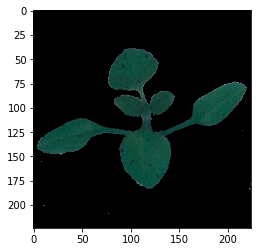

In [10]:
sampleID = 222
#print(images[3])
plt.imshow(images[sampleID])
print("Label:{} , ID:{}, shape:{}".format(labels[sampleID], labels_hot[sampleID], images[sampleID].shape))

In [11]:
if(dataAugment):
    (trainData, valiData, trainLabels, valiLabels) = train_test_split(images, labels_hot, test_size=ratioVal, random_state=42)

In [12]:
print("trainData records: {}".format(len(trainData)))
print("trainData.shape={} trainLabels.shape={}".format(trainData.shape, trainLabels.shape))

if(dataAugment):
    print("valiData records: {}".format(len(valiData)))
    print("valiData.shape={} valiLabels.shape={}".format(valiData.shape, valiLabels.shape))

trainData records: 3800
trainData.shape=(3800, 224, 224, 3) trainLabels.shape=(3800,)
valiData records: 950
valiData.shape=(950, 224, 224, 3) valiLabels.shape=(950,)


In [13]:
trainLabels_hot = np_utils.to_categorical(trainLabels)
print("Train dataset: ", trainLabels_hot.shape)

if(dataAugment):
    valiLabels_hot = np_utils.to_categorical(valiLabels)
    print("Validate dataset:", valiLabels_hot.shape)

Train dataset:  (3800, 12)
Validate dataset: (950, 12)


In [14]:

trainData_normalize = trainData.astype('float32') / 255.0

if(dataAugment):
    valiData_normalize = valiData.astype('float32') / 255.0
    
testImages_normalize = testImages.astype('float32') / 255.0


In [15]:
if(dataAugment):
    train_datagen = ImageDataGenerator(
        zoom_range = 0.15,
        shear_range=0.5,
        rotation_range = 60)
    
    valdi_datagen =  ImageDataGenerator(
        zoom_range = 0.15,
        shear_range=0.5,
        rotation_range = 60)
    
    train_generator = train_datagen.flow(trainData_normalize, trainLabels_hot, batch_size=batch_size)
    valdi_generator = valdi_datagen.flow(valiData_normalize, valiLabels_hot, batch_size=batch_size)    

# Models

In [16]:
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.callbacks import LearningRateScheduler
from keras.layers import BatchNormalization

In [17]:
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# input layer
visible = Input(shape=(reSize[0], reSize[1], 3))
# first feature extractor
conv1 = Conv2D(64, kernel_size=7, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
pool1 = Dropout(0.25)(pool1)
conv11 = Conv2D(64, kernel_size=5, activation='relu')(pool1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
pool11 = Dropout(0.25)(pool11)
flat1 = Flatten()(pool11)
# second feature extractor
conv2 = Conv2D(32, kernel_size=3, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
pool2 = Dropout(0.25)(pool2)
conv21 = Conv2D(32, kernel_size=3, activation='relu')(pool2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
pool21 = Dropout(0.25)(pool21)
flat2 = Flatten()(pool21)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(512, activation='relu')(merge)
hidden1 = Dropout(0.4)(hidden1)
# prediction output
output = Dense(12, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
#plot_model(model, to_file='shared_input_layer.png')


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 218, 218, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                (None, 222, 222, 32)  896         input_1[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 109, 109, 64)  0           conv2d_1[0][0]                   
___________________________________________________________________________________________

In [18]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]


In [19]:
steps_per_epoch=int((len(trainData_normalize)*augRatio)/batch_size)
validation_steps = int((len(valiData_normalize)*augRatio)/batch_size)

print("batch_size={}".format(batch_size))
print("trainLabels_hot.shape={}".format(trainLabels_hot.shape))
print("steps_per_epoch={}".format(steps_per_epoch))

batch_size=64
trainLabels_hot.shape=(3800, 12)
steps_per_epoch=178


In [ ]:
#from keras.optimizers import SGD
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])

#sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

#ADAM = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#model.compile(loss='categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1e-4, momentum=0.9),
#              metrics=['accuracy'])

if(dataAugment):
    train_history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=valdi_generator, validation_steps=validation_steps, callbacks=callbacks_list)
    #train_history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, 
    #                validation_data=valdi_generator, validation_steps=validation_steps)
    
else:    
    train_history = model.fit(x=trainData_normalize, y=trainLabels_hot, validation_split=ratioVal, 
                              epochs=epochs, batch_size=batch_size, verbose=1, callbacks=callbacks_list)

Epoch 1/100
178/178 [==============================] - 2694s - loss: 0.2421 - acc: 0.9178 - val_loss: 0.2004 - val_acc: 0.9274
Epoch 2/100
178/178 [==============================] - 2680s - loss: 0.1654 - acc: 0.9352 - val_loss: 0.1317 - val_acc: 0.9490
Epoch 3/100
178/178 [==============================] - 2678s - loss: 0.1372 - acc: 0.9464 - val_loss: 0.1305 - val_acc: 0.9483
Epoch 4/100
178/178 [==============================] - 2678s - loss: 0.1201 - acc: 0.9531 - val_loss: 0.1067 - val_acc: 0.9607
Epoch 5/100
178/178 [==============================] - 2678s - loss: 0.1066 - acc: 0.9584 - val_loss: 0.1051 - val_acc: 0.9600
Epoch 6/100
178/178 [==============================] - 2678s - loss: 0.0973 - acc: 0.9628 - val_loss: 0.0863 - val_acc: 0.9659
Epoch 7/100
178/178 [==============================] - 2676s - loss: 0.0870 - acc: 0.9666 - val_loss: 0.0907 - val_acc: 0.9657
Epoch 8/100
178/178 [==============================] - 2677s - loss: 0.0854 - acc: 0.9672 - val_loss: 0.0796 - 

In [ ]:
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
Y_pred = model.predict(testImages_normalize)

In [ ]:
print(model.predict(testImages_normalize[0]))

In [ ]:
import pandas as pd 
inv_dict_labels = {v: k for k, v in dict_labels.items()}

results = np.argmax(Y_pred,axis = 1)
testFiles = []
testPredict = []
i=0
for filename in os.listdir(testDataset):
    #print("{}) {}".format(i, results[i]))
    testFiles.append(filename)
    testPredict.append(inv_dict_labels[results[i]])
    print("{},{}".format(filename, inv_dict_labels[results[i]]))
    i += 1

submission = pd.DataFrame({
        "file": testFiles,
        "species": testPredict
    })
submission.to_csv('Plant-submission.csv', index=False)